In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data
Let's plot some images to check if the output is correct

<IPython.core.display.Javascript object>


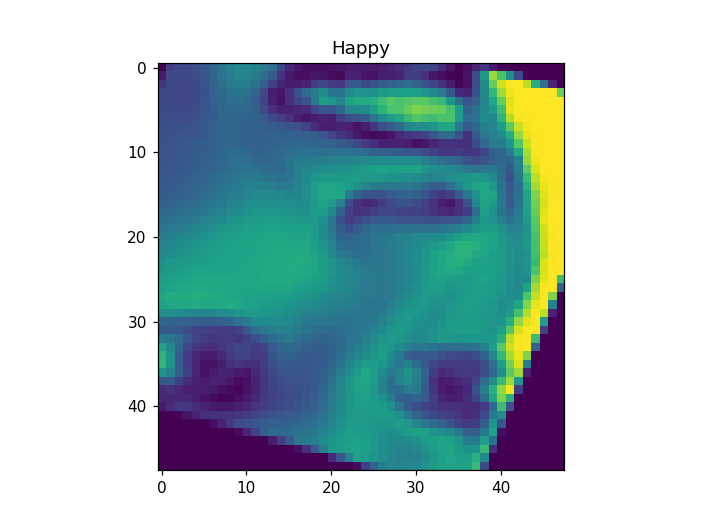

In [27]:
import matplotlib.pyplot as plt
from data.FacialExpressionDataset import FacialExpressionDataset
from data.transformation import val_transform, train_transform
from Project import Project

project = Project()
ds = FacialExpressionDataset(project.data_dir / 'facial_expression/train', transform=train_transform)

img, lab = ds[10000]

fig = plt.figure()
plt.title(ds.label_to_name[lab])
plt.imshow(img.squeeze())

Looking good! :)

## Model
We need to change resnet architecture to allow gray images (1-channel) and to output the correct number of classes (8)

In [43]:
import torch.nn as nn
from torchvision.models import resnet18

def resnet_factory(resnet, n_channel=3, n_classes=1000):
    model = resnet(pretrained=False)
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    model.fc = nn.Linear(512, 8)
    return model

model = resnet_factory(resnet18, n_channel=1, n_classes=len(ds.label_to_name))

x = ds[0][0].unsqueeze(0)
model(x).shape

torch.Size([1, 8])

### summary
Let's inspect the sizes of each layer



In [48]:
import torch
from torchsummary import summary

device = 'cuda' if torch.cuda.is_available() else 'cpu'

summary(model.to(device), (x.shape[1:]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 24, 24]           3,136
       BatchNorm2d-2           [-1, 64, 24, 24]             128
              ReLU-3           [-1, 64, 24, 24]               0
         MaxPool2d-4           [-1, 64, 12, 12]               0
            Conv2d-5           [-1, 64, 12, 12]          36,864
       BatchNorm2d-6           [-1, 64, 12, 12]             128
              ReLU-7           [-1, 64, 12, 12]               0
            Conv2d-8           [-1, 64, 12, 12]          36,864
       BatchNorm2d-9           [-1, 64, 12, 12]             128
             ReLU-10           [-1, 64, 12, 12]               0
       BasicBlock-11           [-1, 64, 12, 12]               0
           Conv2d-12           [-1, 64, 12, 12]          36,864
      BatchNorm2d-13           [-1, 64, 12, 12]             128
             ReLU-14           [-1, 64,